In [51]:
# Loading 
import glob 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, hilbert, chirp
from itertools import islice 
from matplotlib.font_manager import FontProperties
from sklearn.decomposition import PCA
import missingno as msno
from sklearn.preprocessing import scale, normalize



In [144]:
subject18 = pd.read_csv('data/110018_features900.csv')

In [145]:
# Define the different features related to tremor and bradykinesia 

featuresT = ['TremorPowerAccXL', 'TremorPowerAccYL', 'TremorPowerAccZL',
       'TremorPowerGyrXL', 'TremorPowerGyrYL', 'TremorPowerGyrZL', 'TremorPowerAccXR', 'TremorPowerAccYR',
       'TremorPowerAccZR', 'TremorPowerGyrXR', 'TremorPowerGyrYR','TremorPowerGyrZR','tremor']

featuresB = [ 'bradyPoweraccXL', 'DomFreqaccXL', 'DomEnergyRatioaccXL', 'RMSaccXL',
       'AmpRangeaccXL', 'bradyPoweraccYL', 'DomFreqaccYL',
       'DomEnergyRatioaccYL', 'RMSaccYL', 'AmpRangeaccYL', 'bradyPoweraccZL',
       'DomFreqaccZL', 'DomEnergyRatioaccZL', 'RMSaccZL', 'AmpRangeaccZL',
       'MaxCCL', 'MaxCCLocL', 'bradyPoweraccXR', 'DomFreqaccXR',
       'DomEnergyRatioaccXR', 'RMSaccXR', 'AmpRangeaccXR', 'bradyPoweraccYR',
       'DomFreqaccYR', 'DomEnergyRatioaccYR', 'RMSaccYR', 'AmpRangeaccYR',
       'bradyPoweraccZR', 'DomFreqaccZR', 'DomEnergyRatioaccZR', 'RMSaccZR',
       'AmpRangeaccZR', 'MaxCCR', 'MaxCCLocR','slowness']

# other questionaire 
esmColumns = ['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense', 'phy_sleepy', 'phy_tired',
           'mood_cheerf', 'mood_relax', 'thou_concent', 'pat_hallu', 'loc_where',
           'soc_who', 'soc_who02', 'soc_who03', 'act_what', 'act_what02',
           'act_what03', 'act_norpob', 'prob_mobility', 'prob_stillness',
           'prob_speech', 'prob_walking','stiffness', 'tension', 'dyskinesia', 'onoff',
           'medic', 'beep_disturb', '_datetime', '_datetime_e', 'dayno_n', 'beepno_n','duration']



In [146]:
dat18 = subject18.drop(esmColumns,axis=1,errors='ignore')

## Detection of NaN

In [147]:
dataT = dat18[featuresT]
dataB = dat18[featuresB]

<AxesSubplot:>

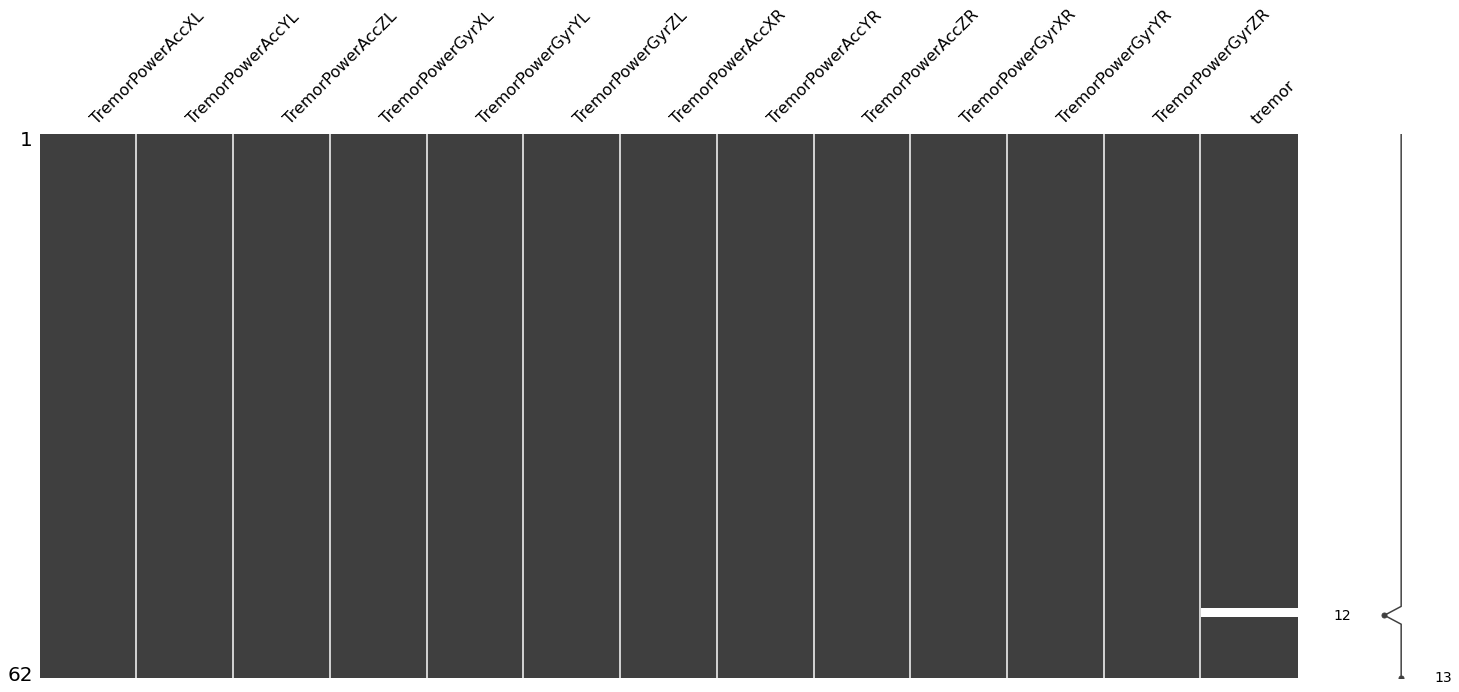

In [148]:
msno.matrix(dataT)

<AxesSubplot:>

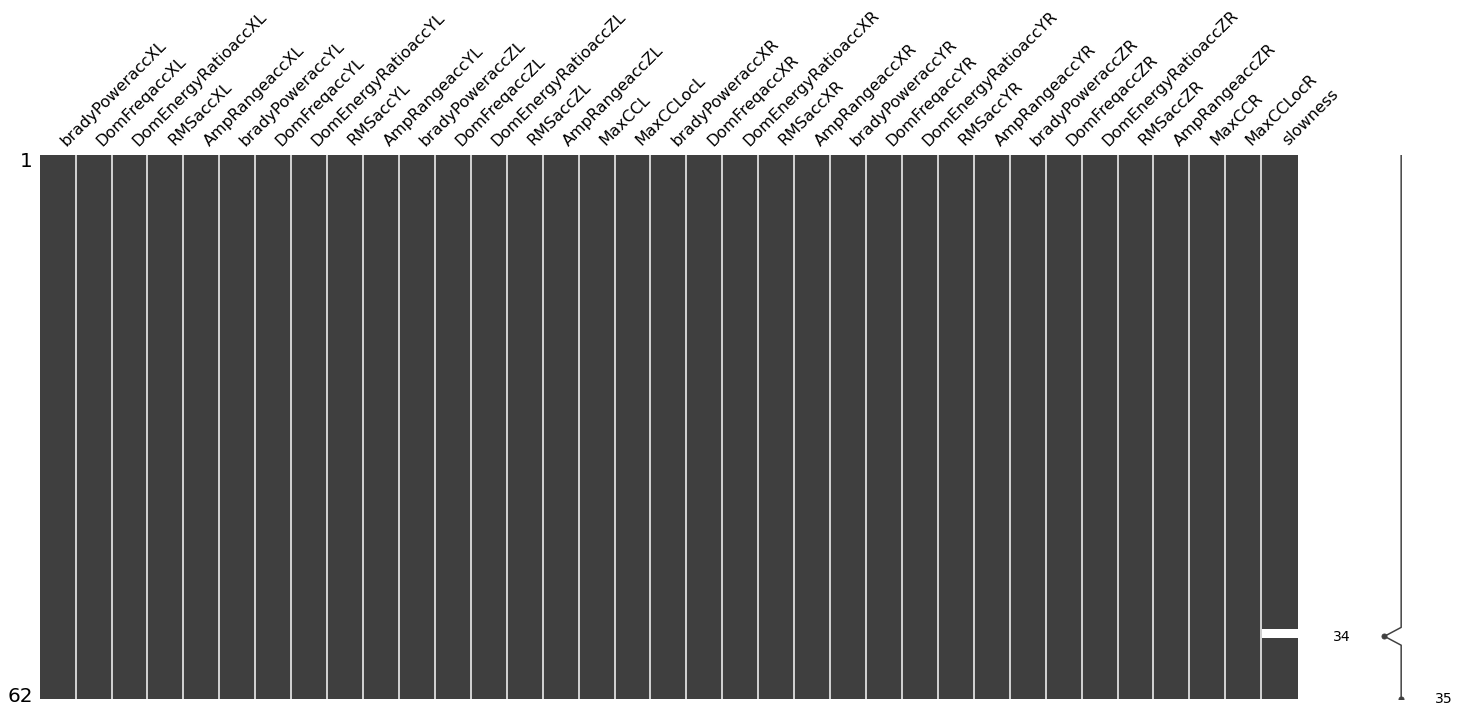

In [149]:
msno.matrix(dataB)

In [150]:
# removed samples with Nan as they are located at the labels 
dataT = dataT.dropna(subset=['tremor'],axis=0, how='any', thresh=None,inplace=False)
dataB = dataB.dropna(subset=['slowness'],axis=0, how='any', thresh=None,inplace=False)

## Explorative analysis 


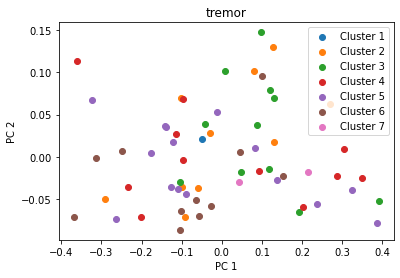

In [151]:
#PCA 

X_pca = PCA(n_components=2).fit_transform(normalize(dataT.drop(['tremor'],axis = 1)))
tremor = dataT['tremor']

for i in range(1,7+1):
    plt.scatter(X_pca[tremor == i, 0], X_pca[tremor == i, 1], label=f'Cluster {i}')
plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('tremor')
plt.show()

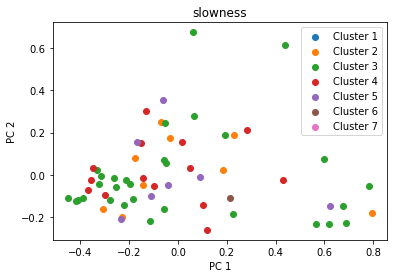

In [152]:
X_pca = PCA(n_components=2).fit_transform(normalize(dataB.drop(['slowness'],axis = 1)))
slow = dataB['slowness']

for i in range(1,7+1):
    plt.scatter(X_pca[slow == i, 0], X_pca[slow == i, 1], label=f'Cluster {i}')
plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('slowness')
plt.show()

In [153]:
Upper = dataT[(dataT['tremor']==7) |(dataT['tremor']==5) |(dataT['tremor']==6)]
Upper = dataT[(dataT['tremor']==1) |(dataT['tremor']==2) |(dataT['tremor']==3)|(dataT['tremor']==4)]

In [168]:
dataT['state']= ['upper' if x >= 4 else 'lower' for x in dataT['tremor']]
#dataT['right']= ['upper' if x >= 5 else 'lower' for x in dataT['tremor']]
# dataT['left']= [x['TremorPowerAccYL'] for x in dataT]
dataT['left']=dataT.apply(lambda x: np.sqrt(np.mean(x['TremorPowerAccXL']**2 + x['TremorPowerAccYL']**2 +  x['TremorPowerAccZL']**2)) ,axis=1)
dataT['right']=dataT.apply(lambda x: np.sqrt(np.mean(x['TremorPowerAccXR']**2 + x['TremorPowerAccYR']**2 +  x['TremorPowerAccZR']**2)) ,axis=1)


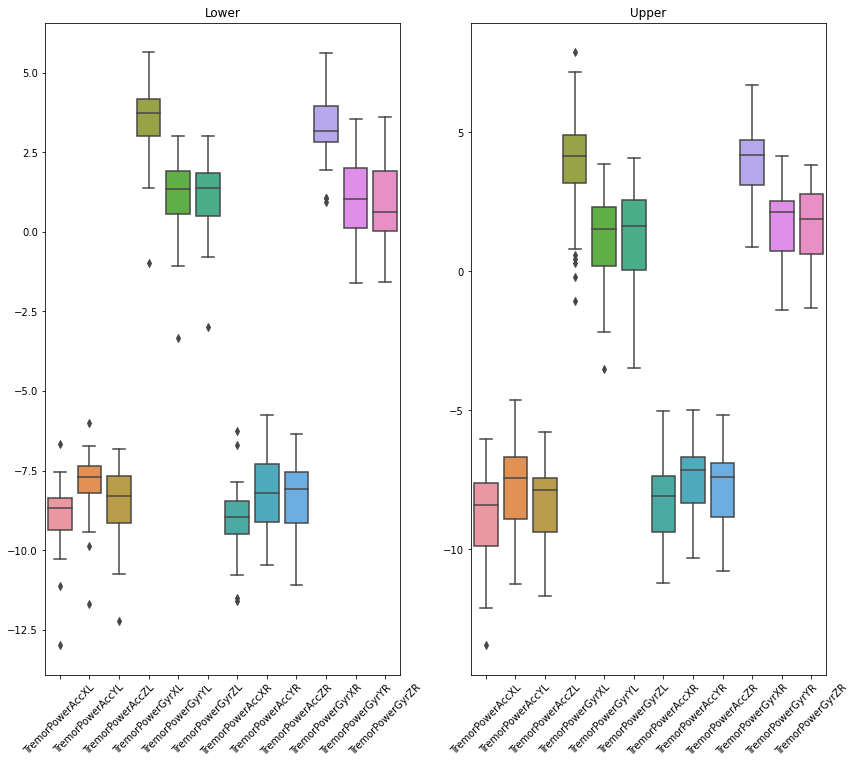

In [169]:
import seaborn as sns

fig = plt.figure(figsize=(14,12))

plt.subplot(1,2,1)
sns.boxplot(data = dataT[dataT['state'] == 'lower'][['TremorPowerAccXL', 'TremorPowerAccYL', 'TremorPowerAccZL',
       'TremorPowerGyrXL', 'TremorPowerGyrYL', 'TremorPowerGyrZL', 'TremorPowerAccXR', 'TremorPowerAccYR',
       'TremorPowerAccZR', 'TremorPowerGyrXR', 'TremorPowerGyrYR','TremorPowerGyrZR']])
plt.xticks(rotation=45)
plt.title('Lower')



plt.subplot(1,2,2)
sns.boxplot(data = dataT[dataT['state'] == 'upper'][['TremorPowerAccXL', 'TremorPowerAccYL', 'TremorPowerAccZL',
       'TremorPowerGyrXL', 'TremorPowerGyrYL', 'TremorPowerGyrZL', 'TremorPowerAccXR', 'TremorPowerAccYR',
       'TremorPowerAccZR', 'TremorPowerGyrXR', 'TremorPowerGyrYR','TremorPowerGyrZR']])
plt.xticks(rotation=45)
plt.title('Upper')
plt.show()